### Affine Transformations

Affine transformation is a transformation that preserves points, straight lines, and planes. When applying affine transformations, parallel lines remain parallel, but angles between lines or the lengths of the lines may not be preserved.
Types:
1. Translation
2. Rotation
3. Scaling
4. Shearing

These transformations are described with matrices (What 3Blue1Brown videos describes in 'Essence of Linear Algebra' playlist)

### Translation

Translation matrix is:
$
\begin{bmatrix}
    1 & 0 & t_{x} \\
    0 & 1 & t_{y} \\
    0 & 0 & 1
\end{bmatrix}
$

Imagine the 1st column be the change to the $\hat{i}$, 2nd column be the change to the $\hat{j}$ basis vectors with the transformation applied. 3rd column is the change in $\hat{k}$ basis vector. Since the z dimension remains same, the change is only in the XY plane.

$\begin{bmatrix}
    1 & 0 & t_{x} \\
    0 & 1 & t_{y} \\
    0 & 0 & 1
\end{bmatrix}$
$\begin{bmatrix}
    x\\
    y\\
    1
\end{bmatrix} = $
$ x\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + $
$ y\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + $
$ \begin{bmatrix} t_{x} \\ t_{y} \\ 1 \end{bmatrix} = $
$ \begin{bmatrix} x + t_{x} \\ y + t_{y} \\ 1 \end{bmatrix}$

##### What will happen if I add a 4th column to transformation matrix?
It shifts points in 3D by $(t_{x}, t_{y}, t_{z})$

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def show_img(title, image):
    plt.figure(figsize=(6, 4))
    plt.title(title)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

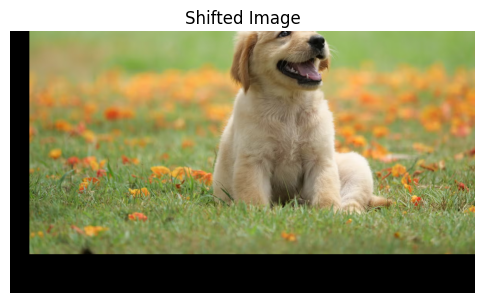

In [9]:
# shift by (50, 100)
img = cv2.imread('./images/dog.jpg')
T = np.float32([[1, 0, 50], [0, 1, -100]])
img_shifted = cv2.warpAffine(img, T, (img.shape[1], img.shape[0])) # img dimension is (height, width)
show_img('Shifted Image', img_shifted)

In [10]:
print(img.shape)
print(img_shifted.shape)

(675, 1200, 3)
(675, 1200, 3)


[[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]


(<Axes: title={'center': 'Output'}>,
 Text(0.5, 1.0, 'Output'))

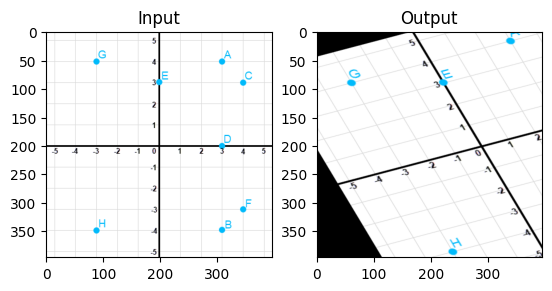

In [11]:
# In affine transformation, all parallel lines in the original image will still be parallel in the output image.
img2 = cv2.imread('./images/coordinate-system.png')
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

T = cv2.getAffineTransform(pts1,pts2)
print(T)

dst = cv2.warpAffine(img2, T, (img2.shape[1], img2.shape[0]))

plt.subplot(121),plt.imshow(img2),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')

Observation: The output was zoomed in because we also made changes to the 1st and 2nd columns of the transformation matrix which means scaling. 

### Scaling

In resizing, change the width and height. In scaling, width to height ratio remains same hence no distortion.

Scaling is usually multiplying pixel coordinates by a factor.
The new pixel grid rarely lines up perfectly with the old one → you need to fill in missing values or merge multiple pixels.

That’s why we need *Interpolation*:

1. Upscaling → need to invent new pixels (e.g., bilinear, bicubic interpolation).

2. Downscaling → need to merge pixels, which is often done with averaging or filtering (to avoid aliasing).

Resizing also needs interpolation in some cases

*List of Interpolation Methods:* \
cv2.INTER_AREA - Good for shrinking or down sampling. resampling using pixel area relation\
cv2.INTER_NEAREST - Fastest. a nearest-neighbor interpolation \
cv2.INTER_LINEAR - Good for zooming or up sampling (default). a bilinear interpolation  \
cv2.INTER_CUBIC - a bicubic interpolation over 4×4 pixel neighborhood\
cv2.INTER_LANCZOS4 - Best. a Lanczos interpolation over 8×8 pixel neighborhood

In [25]:
# cv2.resize(image, dsize(output image size), x scale, y scale, interpolation)
# dsize is (width, height). If dsize is None the output image is calculated as a function of scaling using x & y scale
image_scaled = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_NEAREST)

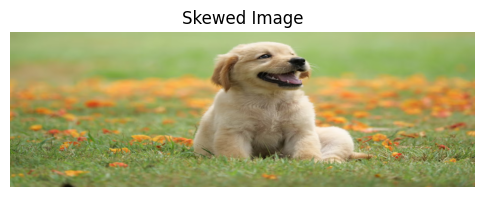

In [29]:
# Let's skew the re-sizing by setting exact dimensions
image_skewed = cv2.resize(img, (900, 300), interpolation=cv2.INTER_LINEAR)
show_img("Skewed Image", image_skewed)